In [3]:
#import pandas and praw
import time
import datetime
import praw
import pandas as pd

In [4]:
#API instance
CLIENT_ID = "S-wUUxp4OsPlVg"
CLIENT_SECRET = "r-YoMO7qLgBIO8--lH5X8tbMEME"
USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/vunne)"

api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
)

In [5]:
results = api.subreddit('powerwashingporn').top(limit = 500)

In [6]:
#Create a list 
submissions = []
for result in results:
    submissions.append({
        "author" : result.author,
        "score" : result.score,
        "comments" : result.num_comments,
        "title" : result.title,      
        "time of creation" : time.ctime(result.created_utc)
    })

In [7]:
#Creating a pandas dataframe
df = pd.DataFrame(submissions)
df.head(5)

,author,comments,score,time of creation,title
0,Qrusader62,1110,52678,Tue Jun 5 18:03:26 2018,My kid's grounded so she had to help power was...
1,Oldmate81,651,51947,Mon Oct 8 01:22:38 2018,Boss: Hey what’s with the camera? Me: I need f...
2,rossgfn,647,46855,Fri Apr 13 18:20:30 2018,Cleaned for the first time in 5 years.
3,IAmASimulation,766,44132,Mon Oct 8 23:38:05 2018,I was powerwashing an older lady’s walk today ...
4,noofatchicks,1043,40621,Wed Mar 28 01:08:09 2018,The best kind of power washing


In [8]:
#top 10 authors
df["author"].value_counts().head(10)

Washnet                 12
GregTheHandyman          6
Oldmate81                6
Wishiwsalilbittaller     5
flufferforfun            4
Lie__Cheat__Steal        4
bgjorge123               4
aloofloofah              4
mikehocksbig             3
KodyUrban                3
Name: author, dtype: int64

In [9]:
#Histogram for comments
df["comments"].plot(kind = 'hist',y="comments", bins = 10)

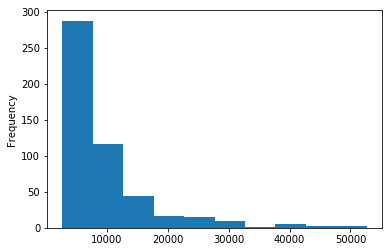

In [10]:
#Histogram for upvotes
df["score"].plot(kind = 'hist', y="score", bins = 10)

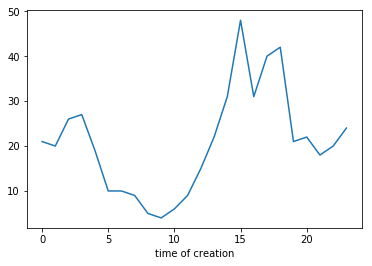

In [11]:
#First I'm changing our dates to actual pandas dates.
#I tried using value_counts but it didn't work with the plot. Instead, using groupby and size 
#I sorted the hours posts are made.
#by using .dt.hour I've also sorted the list by time in hours.

listy = pd.to_datetime(df["time of creation"]).dt.hour
listy_plot = df.groupby(listy).size()
listy_plot.plot()

#This plot shows what times posts are being posted, so the most popular posting times are around 14:00pm.

In [12]:
#To find the comments, I'm using nlargest.
df["comments"].nlargest(1)
#This shows us it's the first in the list & the top submission too, since it's at index 0. I tested this by also using nlargest(20)
df[0:1]

,author,comments,score,time of creation,title
0,Qrusader62,1110,52678,Tue Jun 5 18:03:26 2018,My kid's grounded so she had to help power was...


In [13]:
#to show the comments from our top post we need to get more data from the API.
#I don't want to see MoreComments so I'm removing them with post.comments.replace_more(limit=0)
#By slicing the body with [0:100] i can show the first 100 characters, although it doesn't properly show in pandas.
#But you can see the sliced comments when you check the list 'comm'
post = api.submission(id="8os02l")

from praw.models import MoreComments

post.comments.replace_more(limit=0)

comm = []
for top_level_comment in post.comments:
    comm.append({
        "body" : top_level_comment.body[0:100],
        "commenter" : top_level_comment.author,
        "upvotes" : top_level_comment.ups      
    })

In [14]:
#Making the comment chain a new DataFrame, then sorting them by the Upvotes Column.
comment_df = pd.DataFrame(comm)
topcomment = comment_df.sort_values(by='upvotes', ascending=False)
topcomment.head(5)

,body,commenter,upvotes
1,"Well, if it’s the truth...",Bobatron1993,10302
3,Nice penmanship though.,JG11Bravo1,3745
2,I think my daughter would enjoy this punishmen...,Bubzthetroll,2952
4,r/maliciouscompliance,Streak_Free_Shine,1160
5,bald > toe-less,seanlb,758


In [15]:
comment_df["commenter"].value_counts().sort_values(ascending=False).describe()
#Using this we can see that there's no multiple comments from one redditor in this dataset. So I'm creating a new dataset
#in which I'm making sure the same user comments multiple times

count    137.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: commenter, dtype: float64

In [43]:
#Scraping a new post. I'm using Obama's AMA.
obama = api.submission(id="z1c9z")

from praw.models import MoreComments

obama.comments.replace_more(limit=5)

commentsobama = []
for top_level_comment in obama.comments:
    commentsobama.append({
        "body" : top_level_comment.body,
        "commenter" : top_level_comment.author,
        "upvotes" : top_level_comment.ups      
    })

ob = pd.DataFrame(commentsobama)

In [107]:
ob_selected = ob.iloc[:,1:3]
ob_selected['commenter'] = ob_selected['commenter'].astype('category')
ob_selected.dtypes
ob_grouped = ob_selected['upvotes'].groupby(ob_selected['commenter']).sum().sort_values()
ob_sorted = pd.DataFrame(ob_grouped)
# ob_sorted['upvotes']
ob_bar = ob_sorted['upvotes'].nlargest(10)

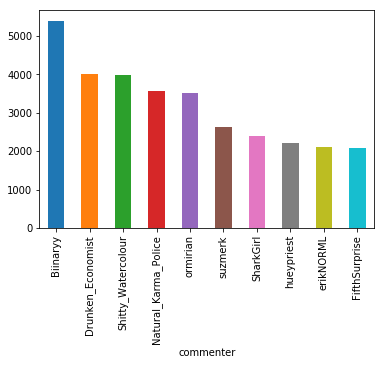

In [108]:
ob_bar.plot(kind='bar')

NotFound: received 404 HTTP response

NotFound: received 404 HTTP response